# Graduate Rotational Internship Program

### Name- Arijit Saha



## Task#2- Predicting percentage of marks of Students

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [2]:
#reading data

df = pd.read_csv(r"C:\Users\Arijit Saha\Desktop\student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Check If any Null Values

In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values are there

### Statistical Details

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization

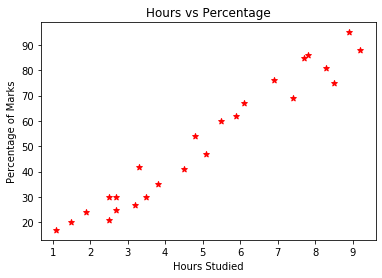

In [5]:
#Plotting distribution of Scores


plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Marks")
plt.scatter(df.Hours,df.Scores,color= 'red', marker= '*')

From the graph above,it shows that both the hours studied and percentage of marks has a positive linear relationship

<BarContainer object of 25 artists>

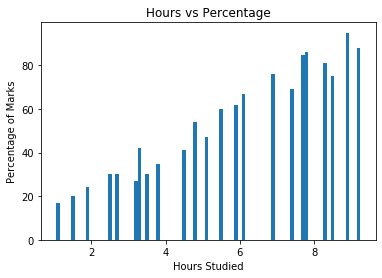

In [6]:
#plotting bar cahrt

plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Marks")
plt.bar(df.Hours,df.Scores,width=0.1)

In [7]:
#correlation of all columns

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


So, the number of hours a student studies is highly correlated with percentage of marks and vice versa

## Preparing the Data

#### Dividing the dataset into Attributes(inputs) and Labels(output)

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

## Training data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


We have split our data into training and testing sets, and now is finally the time to train our algorithm.
Here we chose simple linear regression because the dataset contains only two variables.


In [10]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making predictions

In [11]:
print(X_test)
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
com_df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
com_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


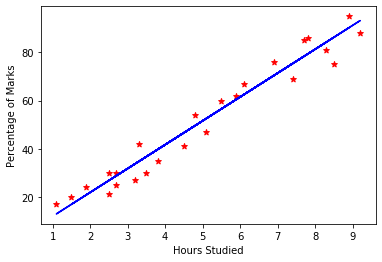

In [13]:
plt.xlabel("Hours Studied")
plt.ylabel("Percentage of Marks")
plt.scatter(df.Hours,df.Scores, color ='red', marker= '*')
plt.plot(df.Hours,reg.predict(df[['Hours']]),color='blue')

Best Fit line

#### Visualizing Actual vs Predicted

Text(0, 0.5, 'Percentage of Marks')

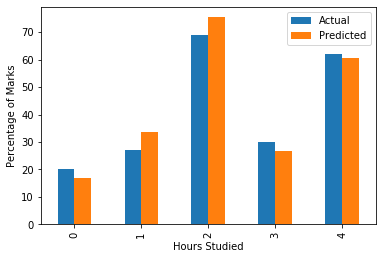

In [14]:
com_df.plot(kind='bar')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of Marks')

### Performance of Model

In [15]:
from sklearn import metrics

print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
print("r2 Score",metrics.r2_score(y_test,y_pred))

Mean Absolute Error 4.183859899002982
Mean Squared Error 21.598769307217456
r2 Score 0.9454906892105354


R2 score is near 1 so it means the model's performance is pretty good

### What will be the predicted score if a student studies for 9.25hrs/day?

In [16]:
reg.predict(np.array([[9.25]]))

array([93.69173249])

#### marks = 93.69

In [17]:
reg.coef_

array([9.91065648])

In [18]:
reg.intercept_

2.018160041434662

 Let's check if the above result is correct or not by putting coefficient and intercept into the equation, y=mx+c

In [19]:
9.91065648*9.25 + 2.018160041434662

93.69173248143466

So,Yes its correct

### CONCLUSION: From the above prediction , we can say that if a Student studies for 9.25hours/day he can score 93.69 marks .

## THANK YOU